# Yahoo Finance 

- Open is the price of the stock at the beginning of the trading day (it need not be the closing price of the previous trading day)
- high is the highest price of the stock on that trading day, low the lowest price of the stock on that trading day
- close the price of the stock at closing time. 
- Volume indicates how many stocks were traded
- Adjusted prices (such as the adjusted close) is the price of the stock that adjusts the price for corporate actions
- stock prices are considered to be set mostly by traders, stock splits (when the company makes each extant stock worth two and halves the price) and dividends (payout of company profits per share) also affect the price of a stock and should be accounted for


- past performance is no indicator of future performance in stocks!!!!

In [1]:
# Imported packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load in data
#'Year' was dropped from dataframe because it was redundant to date
data = pd.read_csv('Capstone_Data_Edit.csv')
data = data.drop(['Year'], axis=1)
data_copy = data

data_copy.head(5)

,Date,Month,Temp_Anamoly,Avg_Temp_F,Avg_Precip_In,CORN_Open,CORN_High,CORN_Low,CORN_Close,CORN_Volume,...,PEP_Open,PEP_High,PEP_Low,PEP_Close,PEP_Volume,CPB_Open,CPB_High,CPB_Low,CPB_Close,CPB_Volume
0,1/3/12,January,0.5,36.12,2.09,42.73,42.99,42.18,42.62,"114,100",...,66.86,67.19,66.36,66.40,"5,348,800",33.50,33.69,32.93,32.98,"1,854,500"
1,1/4/12,January,0.5,36.12,2.09,42.79,42.95,42.20,42.51,"43,900",...,66.41,66.84,66.12,66.74,"6,042,400",33.00,33.18,32.66,32.73,"1,721,200"
2,1/5/12,January,0.5,36.12,2.09,42.25,42.25,41.35,41.51,"87,400",...,66.58,66.67,66.12,66.22,"4,909,100",32.69,32.73,31.80,31.81,"4,621,400"
3,1/6/12,January,0.5,36.12,2.09,41.72,41.80,41.26,41.35,"31,000",...,66.27,66.27,65.29,65.39,"6,533,000",31.75,31.83,31.22,31.45,"4,981,500"
4,1/9/12,January,0.5,36.12,2.09,42.05,42.52,41.87,42.19,"153,700",...,65.26,65.83,65.01,65.73,"5,859,600",31.53,31.91,31.50,31.83,"1,759,800"


In [3]:
#change Date into DateTime data type and make it index
#https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial
#double check in .info() that change was made--change made
data_copy.Date = pd.to_datetime(data_copy.Date)
data_copy.set_index('Date', inplace=True)
data_copy.head(5)

,Month,Temp_Anamoly,Avg_Temp_F,Avg_Precip_In,CORN_Open,CORN_High,CORN_Low,CORN_Close,CORN_Volume,WEAT_Open,...,PEP_Open,PEP_High,PEP_Low,PEP_Close,PEP_Volume,CPB_Open,CPB_High,CPB_Low,CPB_Close,CPB_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,January,0.5,36.12,2.09,42.73,42.99,42.18,42.62,"114,100",22.56,...,66.86,67.19,66.36,66.40,"5,348,800",33.50,33.69,32.93,32.98,"1,854,500"
2012-01-04,January,0.5,36.12,2.09,42.79,42.95,42.20,42.51,"43,900",22.64,...,66.41,66.84,66.12,66.74,"6,042,400",33.00,33.18,32.66,32.73,"1,721,200"
2012-01-05,January,0.5,36.12,2.09,42.25,42.25,41.35,41.51,"87,400",21.80,...,66.58,66.67,66.12,66.22,"4,909,100",32.69,32.73,31.80,31.81,"4,621,400"
2012-01-06,January,0.5,36.12,2.09,41.72,41.80,41.26,41.35,"31,000",21.67,...,66.27,66.27,65.29,65.39,"6,533,000",31.75,31.83,31.22,31.45,"4,981,500"
2012-01-09,January,0.5,36.12,2.09,42.05,42.52,41.87,42.19,"153,700",21.82,...,65.26,65.83,65.01,65.73,"5,859,600",31.53,31.91,31.50,31.83,"1,759,800"


In [4]:
#need to change objects to int
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2012 entries, 2012-01-03 to 2019-12-31
Data columns (total 44 columns):
Month            2012 non-null object
Temp_Anamoly     2012 non-null float64
Avg_Temp_F       2012 non-null float64
Avg_Precip_In    2012 non-null float64
CORN_Open        2012 non-null float64
CORN_High        2012 non-null float64
CORN_Low         2012 non-null float64
CORN_Close       2012 non-null float64
CORN_Volume      2012 non-null object
WEAT_Open        2012 non-null float64
WEAT_High        2012 non-null float64
WEAT_Low         2012 non-null float64
WEAT_Close       2012 non-null float64
WEAT_Volume      2012 non-null object
CANE_Open        2012 non-null float64
CANE_High        2012 non-null float64
CANE_Low         2012 non-null float64
CANE_Close       2012 non-null float64
CANE_Volume      2012 non-null object
HSY_Open         2012 non-null float64
HSY_High         2012 non-null float64
HSY_Low          2012 non-null float64
HSY_Close        2012

In [5]:
data_copy.columns

Index(['Month', 'Temp_Anamoly', 'Avg_Temp_F', 'Avg_Precip_In', 'CORN_Open',
       'CORN_High', 'CORN_Low', 'CORN_Close', 'CORN_Volume', 'WEAT_Open',
       'WEAT_High', 'WEAT_Low', 'WEAT_Close', 'WEAT_Volume', 'CANE_Open',
       'CANE_High', 'CANE_Low', 'CANE_Close', 'CANE_Volume', 'HSY_Open',
       'HSY_High', 'HSY_Low', 'HSY_Close', 'HSY_Volume', 'SJM_Open',
       'SJM_High', 'SJM_Low', 'SJM_Close', 'SJM_Volume', 'GIS_Open',
       'GIS_High', 'GIS_Low', 'GIS_Close', 'GIS_Volume', 'PEP_Open',
       'PEP_High', 'PEP_Low', 'PEP_Close', 'PEP_Volume', 'CPB_Open',
       'CPB_High', 'CPB_Low', 'CPB_Close', 'CPB_Volume'],
      dtype='object')

## Temp Anamoly
- source: https://climate.nasa.gov/news/2537/nasa-noaa-data-show-2016-warmest-year-on-record-globally/
- we can see a big peak in 2016
- Earth’s 2016 surface temperatures were the warmest since modern recordkeeping began in 1880
- Globally-averaged temperatures in 2016 were 1.78 degrees Fahrenheit warmer than the mid-20th century mean

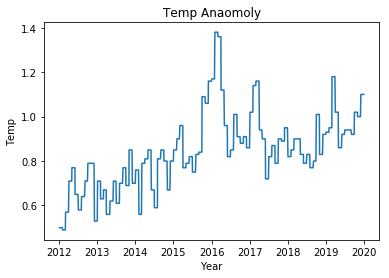

In [32]:
#biggest temperature anamoly is in 2016
plt.plot(data_copy['Temp_Anamoly'])
plt.title('Temp Anaomoly')
plt.ylabel('Temp')
plt.xlabel('Year')
plt.show()

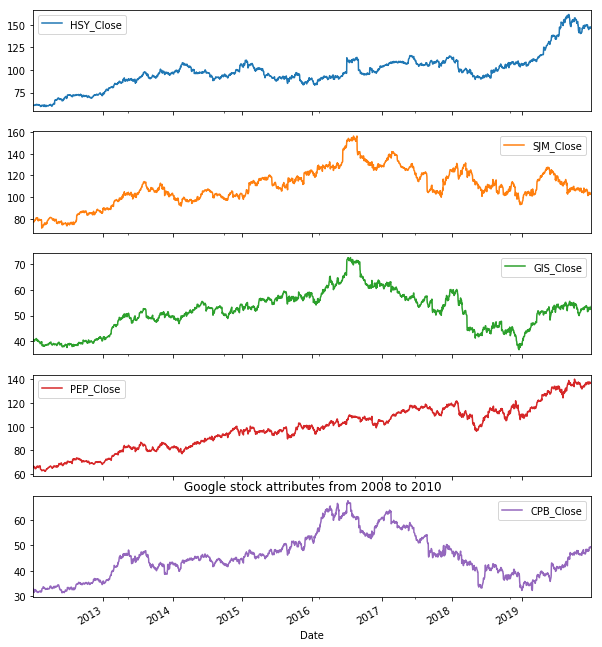

In [9]:
company['2012':'2019'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
#plt.savefig('stocks.png')
plt.show()

### Normalization
- stocks data
- -0.5 < s < 0.5

In [35]:
#no need for normalization
print('Temp_Anamoly ' , data_copy['Temp_Anamoly'].skew())

#normalized
print('Avg_Temp_F ' , data_copy['Avg_Temp_F'].skew())
data_copy['Avg_Temp_F_normal']= np.log(data_copy['Avg_Temp_F'])
print('Avg_Temp_F_normal'  , data_copy['Avg_Temp_F_normal'].skew())

#no need for normalization
print('Avg_Precip_In' , data_copy['Avg_Precip_In'].skew())

Temp_Anamoly  0.4945191850518903
Avg_Temp_F  -0.048797577575077584
Avg_Temp_F_normal -0.3019801732794908
Avg_Precip_In 0.28680177738992024


In [36]:
#all commodity data needs to be normalized
print('CORN_Close' , data_copy['CORN_Close'].skew())
data_copy['CORN_Close_normal']= np.log(data_copy['CORN_Close'])
print('CORN_Close_normal' , data_copy['CORN_Close_normal'].skew())


print('WEAT_Close'  , data_copy['WEAT_Close'].skew())
data_copy['WEAT_Close_normal']= np.sqrt(data_copy['WEAT_Close'])
print('WEAT_Close_normal' , data_copy['WEAT_Close_normal'].skew())


print('CANE_Close' , data_copy['CANE_Close'].skew())
data_copy['CANE_Close_normal']= np.sqrt(data_copy['CANE_Close'])
print('CANE_Close_normal' , data_copy['CANE_Close_normal'].skew())

CORN_Close 0.9123169655505068
CORN_Close_normal 0.5168948724335669
WEAT_Close 0.820585789136516
WEAT_Close_normal 0.5866627490410137
CANE_Close 0.7482851086765384
CANE_Close_normal 0.42390588391211126


In [44]:
print('HSY_Close' , data_copy['HSY_Close'].skew())
data_copy['HSY_Close_normal']= np.sqrt(data_copy['HSY_Close'])
print('HSY_Close_normal' , data_copy['HSY_Close_normal'].skew())

print('SJM_Close' , data_copy['SJM_Close'].skew())
data_copy['SJM_Close_normal']= np.sqrt(data_copy['SJM_Close'])
print('SJM_Close_normal' , data_copy['SJM_Close_normal'].skew())

print('GIS_Close' , data_copy['GIS_Close'].skew())
data_copy['GIS_Close_normal']= np.log(data_copy['GIS_Close'])
print('GIS_Close_normal' , data_copy['GIS_Close_normal'].skew())

print('PEP_Close' , data_copy['PEP_Close'].skew())
data_copy['PEP_Close_normal']= np.log(data_copy['PEP_Close'])
print('PEP_Close_normal' , data_copy['PEP_Close_normal'].skew())

print('CPB_Close' , data_copy['CPB_Close'].skew())
data_copy['CPB_Close_normal']= np.log(data_copy['CPB_Close'])
print('CPB_Close_normal' , data_copy['CPB_Close_normal'].skew())

HSY_Close 0.7764530215379407
HSY_Close_normal 0.3519136197301752
SJM_Close 0.047737570411301486
SJM_Close_normal -0.17902841832064562
GIS_Close 0.08644670685822546
GIS_Close_normal -0.2641282342835941
PEP_Close 0.010030486999715291
PEP_Close_normal -0.3595563862600766
CPB_Close 0.5019949736185163
CPB_Close_normal 0.1185173871162644


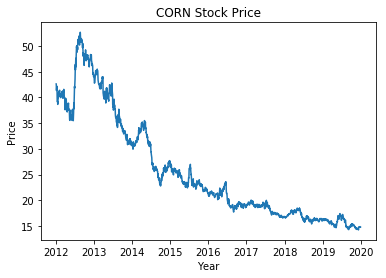

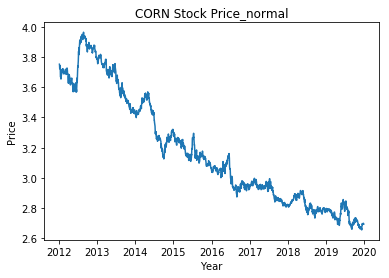

In [45]:
#comparing normal and non normal data
plt.plot(data_copy['CORN_Close'])
plt.title('CORN Stock Price')
plt.ylabel('Price')
plt.xlabel('Year')
plt.show()

plt.plot(data_copy['CORN_Close_normal'])
plt.title('CORN Stock Price_normal')
plt.ylabel('Price')
plt.xlabel('Year')
plt.show()


In [7]:
#create 3 seperate datasets for each item to be observed
climate = data_copy[['Temp_Anamoly','Avg_Temp_F','Avg_Precip_In']]
commodity = data_copy[['CORN_Close','CORN_Volume','WEAT_Close','WEAT_Volume','CANE_Close','CANE_Volume']]
company = data_copy[['HSY_Close','HSY_Volume','SJM_Close','SJM_Volume','GIS_Close','GIS_Volume','PEP_Close','PEP_Volume','CPB_Close','CPB_Volume']]

## Correlations- Climate and Commodity Stock

In [10]:
data_comodity= data_copy[['Month', 'Temp_Anamoly','Avg_Temp_F','Avg_Precip_In',
      'CORN_Open', 'CORN_High', 'CORN_Low', 'CORN_Close',
       'CORN_Volume', 'WEAT_Open', 'WEAT_High', 'WEAT_Low', 'WEAT_Close',
       'WEAT_Volume', 'CANE_Open', 'CANE_High', 'CANE_Low', 'CANE_Close',
       'CANE_Volume']]

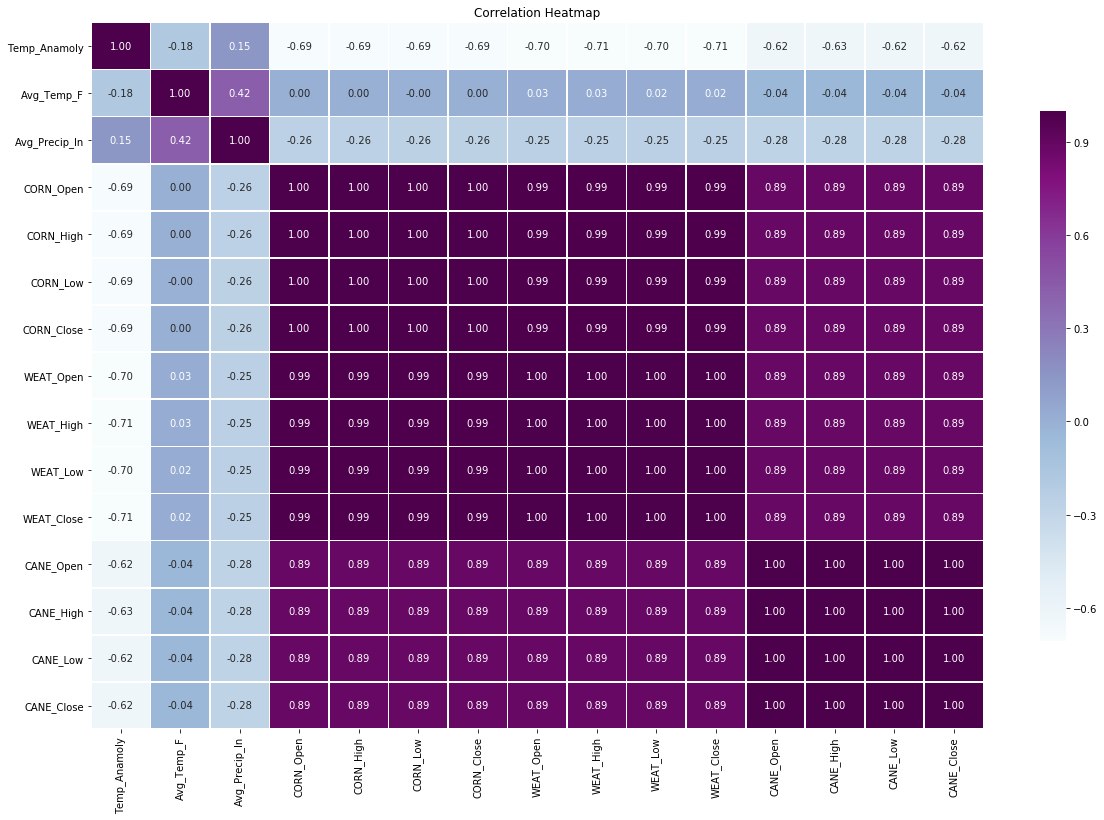

In [11]:
#Created a heatmap to see the correlation between the different variables--commodity and climate
#Created a figure and are able to adjust the size of the graph
plt.figure(figsize = (20,13))

#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(data_comodity.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})

#Created a title
plt.title('Correlation Heatmap')
#plt.savefig('corr_raw.png')

### Correlation Relationships
- Temp_Anamoly has a good correlation with the comodity stocks (highest with WEAT)


- Precipitation does not have a good correlation
- Temperature does not seem to have any correlation with comodity stocks
    

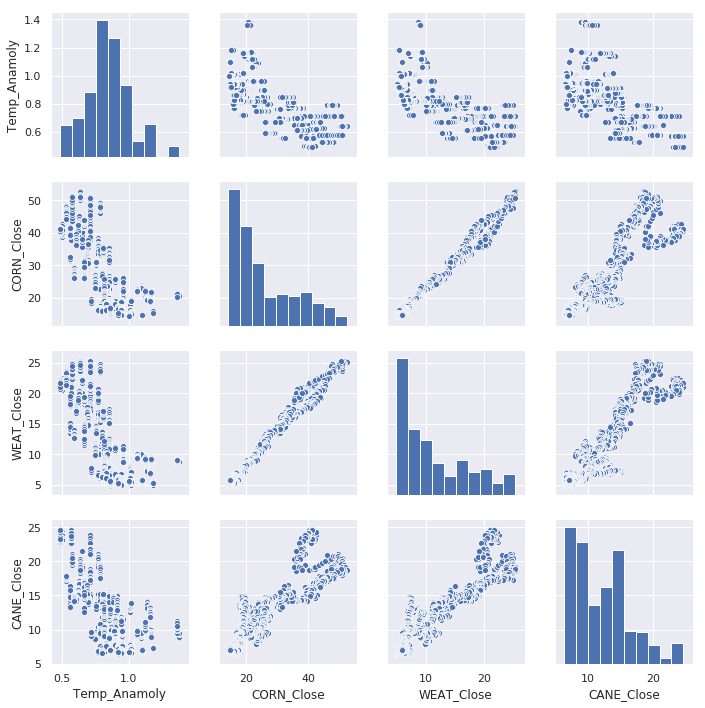

In [41]:
#scatterplot

sns.set()
cols = ['Temp_Anamoly', 'CORN_Close', 'WEAT_Close', 'CANE_Close']
sns.pairplot(data_copy[cols], size = 2.5)
plt.show()

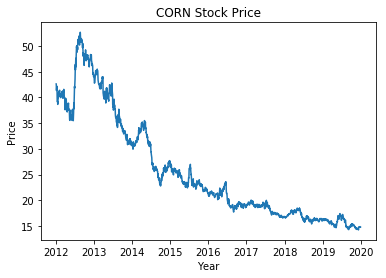

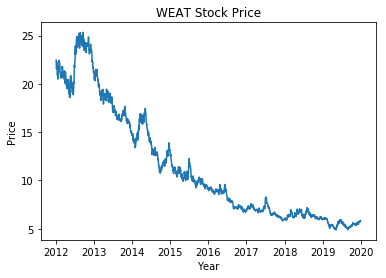

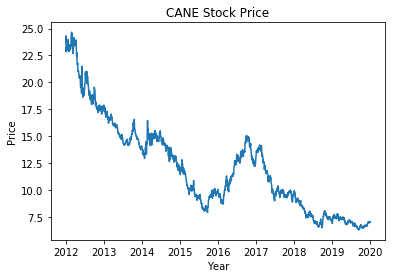

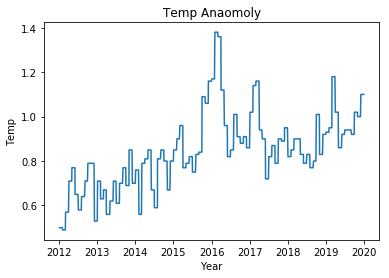

In [24]:
#line plots of close values of comodity stocks
#all stock data from 2012-2019
#from 2012-2019 comody stock prices have plumeted (CANE had small increase)
#can see that temp anaomoly data had 
plt.plot(data_copy['CORN_Close'])
plt.title('CORN Stock Price')
plt.ylabel('Price')
plt.xlabel('Year')
plt.show()

plt.plot(data_copy['WEAT_Close'])
plt.title('WEAT Stock Price')
plt.ylabel('Price')
plt.xlabel('Year')
plt.show()

plt.plot(data_copy['CANE_Close'])
plt.title('CANE Stock Price')
plt.ylabel('Price')
plt.xlabel('Year')
plt.show()


#biggest temperature anamoly is in 2016
plt.plot(data_copy['Temp_Anamoly'])
plt.title('Temp Anaomoly')
plt.ylabel('Temp')
plt.xlabel('Year')
plt.show()

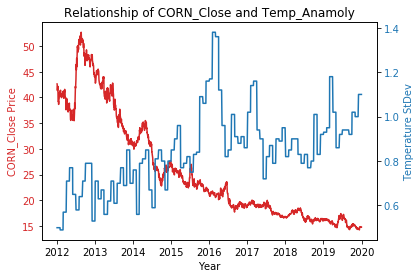

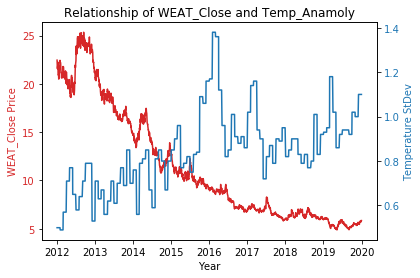

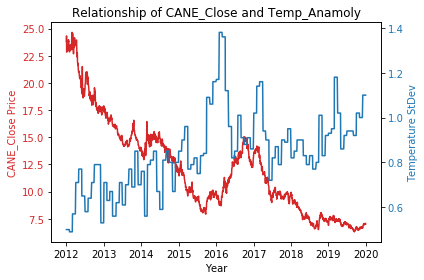

In [20]:
#https://matplotlib.org/gallery/api/two_scales.html
#plotting temp anomoly and price of CORN---inverse relationship

#Graph1
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of CORN_Close and Temp_Anamoly')

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('CORN_Close Price', color=color)
ax1.plot(data_copy['CORN_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature StDev', color=color)  # we already handled the x-label with ax1
ax2.plot(data_copy['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph2
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of WEAT_Close and Temp_Anamoly')

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('WEAT_Close Price', color=color)
ax1.plot(data_copy['WEAT_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature StDev', color=color)  # we already handled the x-label with ax1
ax2.plot(data_copy['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph3
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of CANE_Close and Temp_Anamoly')

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('CANE_Close Price', color=color)
ax1.plot(data_copy['CANE_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature StDev', color=color)  # we already handled the x-label with ax1
ax2.plot(data_copy['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Text(0,0.5,'Temp')

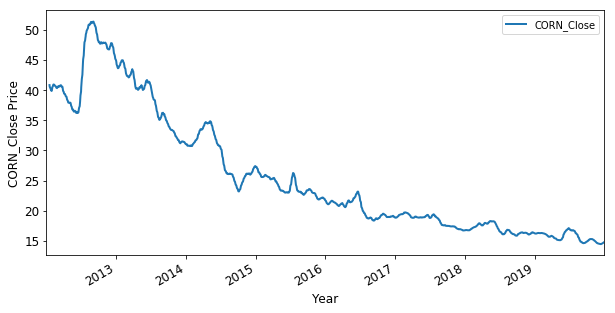

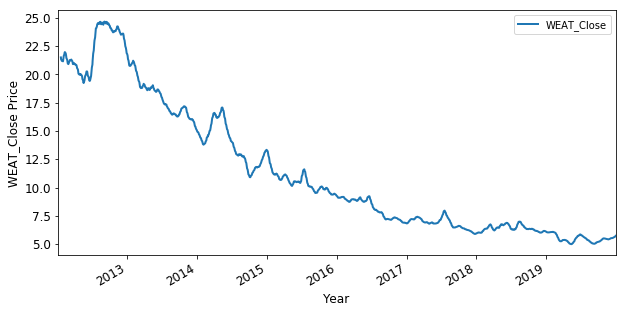

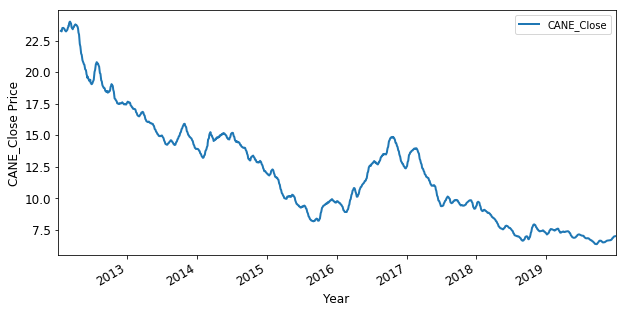

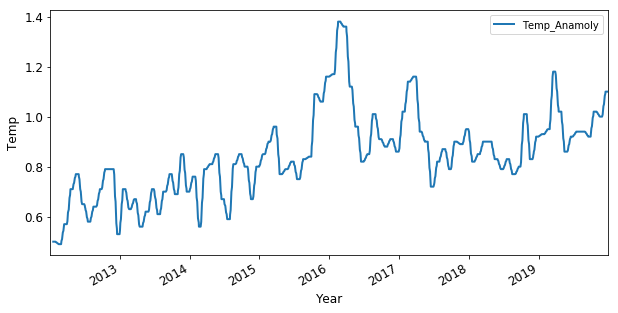

In [21]:
#movign average average
#for each time point, you take the average of the points on either side of it
#https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial
###this help smooth out some of the noise

CORN = data_copy[['CORN_Close']]
CORN.rolling(12).mean().plot(figsize=(10,5), linewidth=2, fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CORN_Close Price', fontsize=12)

WEAT = data_copy[['WEAT_Close']]
WEAT.rolling(12).mean().plot(figsize=(10,5), linewidth=2, fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('WEAT_Close Price', fontsize=12)

CANE = data_copy[['CANE_Close']]
CANE.rolling(12).mean().plot(figsize=(10,5), linewidth=2, fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CANE_Close Price', fontsize=12)

TEMP = data_copy[['Temp_Anamoly']]
TEMP.rolling(12).mean().plot(figsize=(10,5), linewidth=2, fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temp', fontsize=12)

Text(0,0.5,'Close Price')

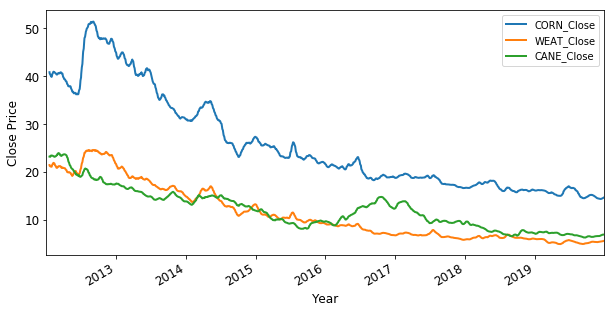

In [43]:
#Combine commodity stock with rolling averages into into graph
#we still see that commodity stock price has declined
#CORN costs more than the others
commodity = pd.concat([CORN.rolling(12).mean(), WEAT.rolling(12).mean(), CANE.rolling(12).mean()], axis=1)
commodity.plot(figsize=(10, 5), linewidth=2, fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Close Price', fontsize=12)



## Correlations- All Data

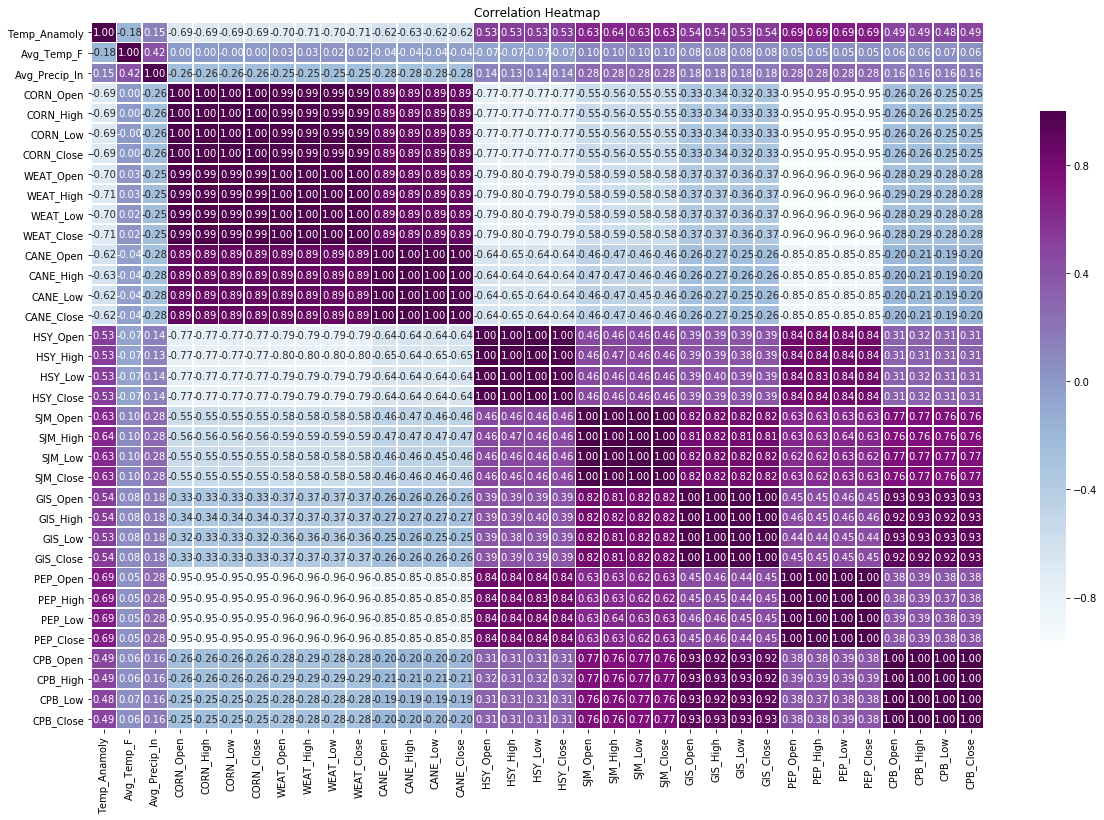

In [12]:
#Created a heatmap to see the correlation between the different variables---all data
#Created a figure and are able to adjust the size of the graph
plt.figure(figsize = (20,13))

#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(data_copy.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})

#Created a title
plt.title('Correlation Heatmap')
#plt.savefig('corr_raw.png')

### Correlation Observations:
- slight positive correlation between Temp_Anamoly and company stocks (SJM and PEP being the most effected)
- comodity stock performance is highly negatively correlated to company stock performance
- PEP company stock performance is highly psoitibely correlated with HSY

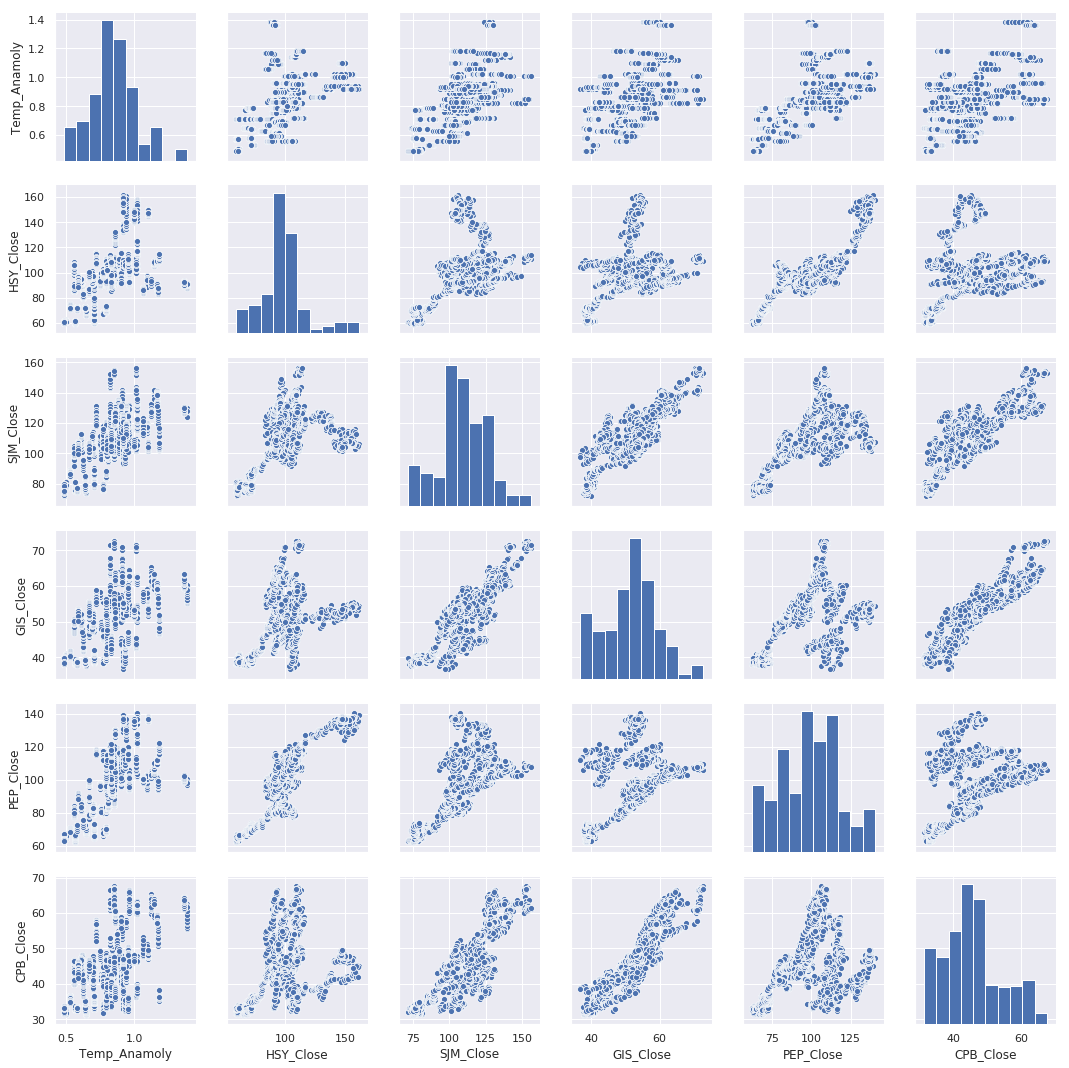

In [42]:
#can clearly see positve correlation with Temp_Anamoly and PEP
sns.set()
cols = ['Temp_Anamoly', 'HSY_Close', 'SJM_Close', 'GIS_Close', 'PEP_Close', 'CPB_Close']
sns.pairplot(data_copy[cols], size = 2.5)
plt.show()

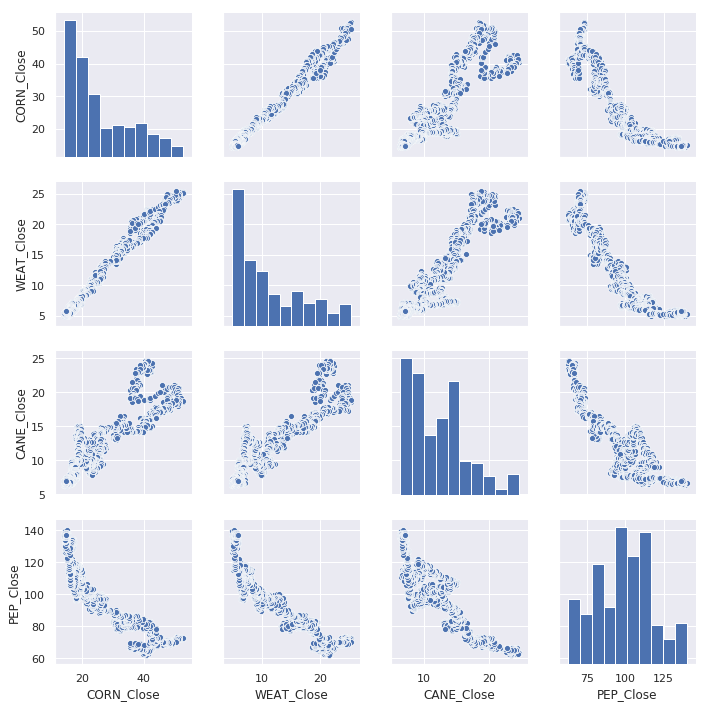

In [43]:
sns.set()
cols = ['CORN_Close', 'WEAT_Close', 'CANE_Close', 'PEP_Close']
sns.pairplot(data_copy[cols], size = 2.5)
plt.show()

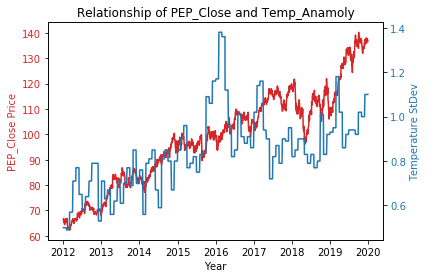

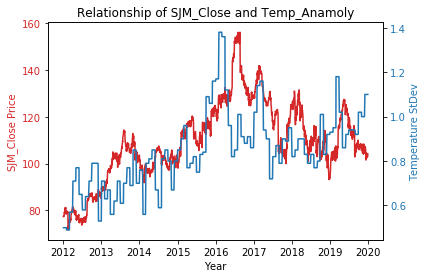

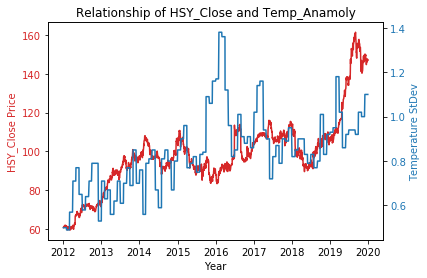

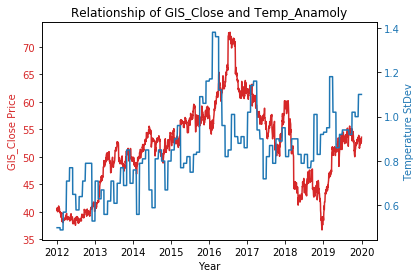

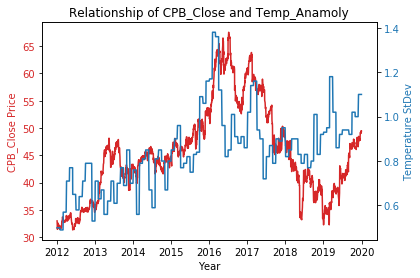

In [30]:
#graphing relationship between Temp_Anaomoly and company stock
#seems that SJM and Temp anamoly follow a very similar path---stocks follows behind
#same cna be said for PEP

#Graph1---good correlation
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of PEP_Close and Temp_Anamoly')

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('PEP_Close Price', color=color)
ax1.plot(data_copy['PEP_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature StDev', color=color)  # we already handled the x-label with ax1
ax2.plot(data_copy['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph2--good correlation
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of SJM_Close and Temp_Anamoly')

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('SJM_Close Price', color=color)
ax1.plot(data_copy['SJM_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature StDev', color=color)  # we already handled the x-label with ax1
ax2.plot(data_copy['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph3
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of HSY_Close and Temp_Anamoly')

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('HSY_Close Price', color=color)
ax1.plot(data_copy['HSY_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature StDev', color=color)  # we already handled the x-label with ax1
ax2.plot(data_copy['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph4
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of GIS_Close and Temp_Anamoly')

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('GIS_Close Price', color=color)
ax1.plot(data_copy['GIS_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature StDev', color=color)  # we already handled the x-label with ax1
ax2.plot(data_copy['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph5
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of CPB_Close and Temp_Anamoly')

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('CPB_Close Price', color=color)
ax1.plot(data_copy['CPB_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature StDev', color=color)  # we already handled the x-label with ax1
ax2.plot(data_copy['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
